# Randomized Search

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split,
)

# Read and split

In [5]:
def read_split():
  breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
  X = pd.DataFrame(breast_cancer_X)
  y = pd.Series(breast_cancer_y).map({0:1, 1:0})
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  return X_train, X_test, y_train, y_test

In [22]:
def initialize_model():
    X_train, X_test, y_train, y_test=read_split()
    gbm = GradientBoostingClassifier(random_state=0)
    # determine the hyperparameter space
    param_grid = dict(
        n_estimators=stats.randint(10, 120),
        min_samples_split=stats.uniform(0, 1),
        max_depth=stats.randint(1, 5),
        loss=('deviance', 'exponential'),
        )
    search = RandomizedSearchCV(gbm,
                            param_grid,
                            scoring='roc_auc',
                            cv=5,
                            n_iter = 60,
                            random_state=10,
                            n_jobs=4,
                            refit=True)

    # find best hyperparameters
    search.fit(X_train, y_train)
    return search,X_train, X_test, y_train, y_test

In [23]:
search,X_train, X_test, y_train, y_test=initialize_model()

In [17]:
print(search.best_params_)

{'loss': 'exponential', 'max_depth': 3, 'min_samples_split': 0.5345579488018151, 'n_estimators': 99}


In [24]:
results = pd.DataFrame(search.cv_results_)


In [25]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results[['param_max_depth', 'param_min_samples_split', 'param_n_estimators','mean_test_score', 'std_test_score']]

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
0,3,0.534558,99,0.993171,0.006967
1,2,0.043097,115,0.992885,0.005906
2,2,0.020752,74,0.992763,0.006273
3,4,0.565507,92,0.992689,0.006204
4,2,0.30546,92,0.992567,0.007091
5,2,0.456305,118,0.992487,0.005838
6,2,0.519797,98,0.992345,0.005370
7,3,0.171239,117,0.992158,0.007502
8,4,0.563191,88,0.992149,0.006361
9,3,0.212213,110,0.991893,0.008426


Text(0.5, 0, 'Hyperparameter space')

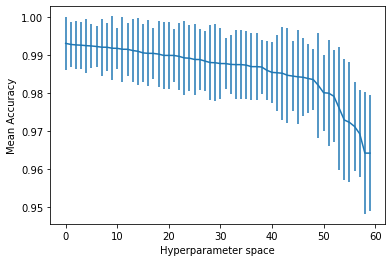

In [26]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter space')

In [27]:
X_train_preds = search.predict_proba(X_train)[:,1]
X_test_preds = search.predict_proba(X_test)[:,1]
print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  1.0
Test roc_auc:  0.9988242210464433
